Plot a 3D volume of MR image in multiple approaches:
`multi_viewer_presskey`: `left`key to previous slice
                         `right`key to next slice
`multi_viewer_scroll`: scroll wheel to shift slices
`animation_viewer`: image visulized as animation

In [14]:
from readimgmask import readimgmask as imread
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

In [2]:
dcmpath = r'C:\Users\mingx\OneDrive\project1\testdata\10245852\dicom\C'
maskpath = r'C:\Users\mingx\OneDrive\project1\testdata\10245852\c+'
image, mask = imread(dcmpath, maskpath)
img_arr = sitk.GetArrayFromImage(image)

In [3]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)


def multi_viewer_presskey(volume):
    remove_keymap_conflicts({'left', 'right'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    ax.set_title('Slice ' + str(ax.index))
    fig.canvas.mpl_connect('key_press_event', process_key)
    
    
def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'left':
        previous_slice(ax)
    elif event.key == 'right':
        next_slice(ax)
    fig.canvas.draw()
    
    
def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])
    ax.set_title('Slice ' + str(ax.index))


def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    ax.set_title('Slice ' + str(ax.index))

<IPython.core.display.Javascript object>


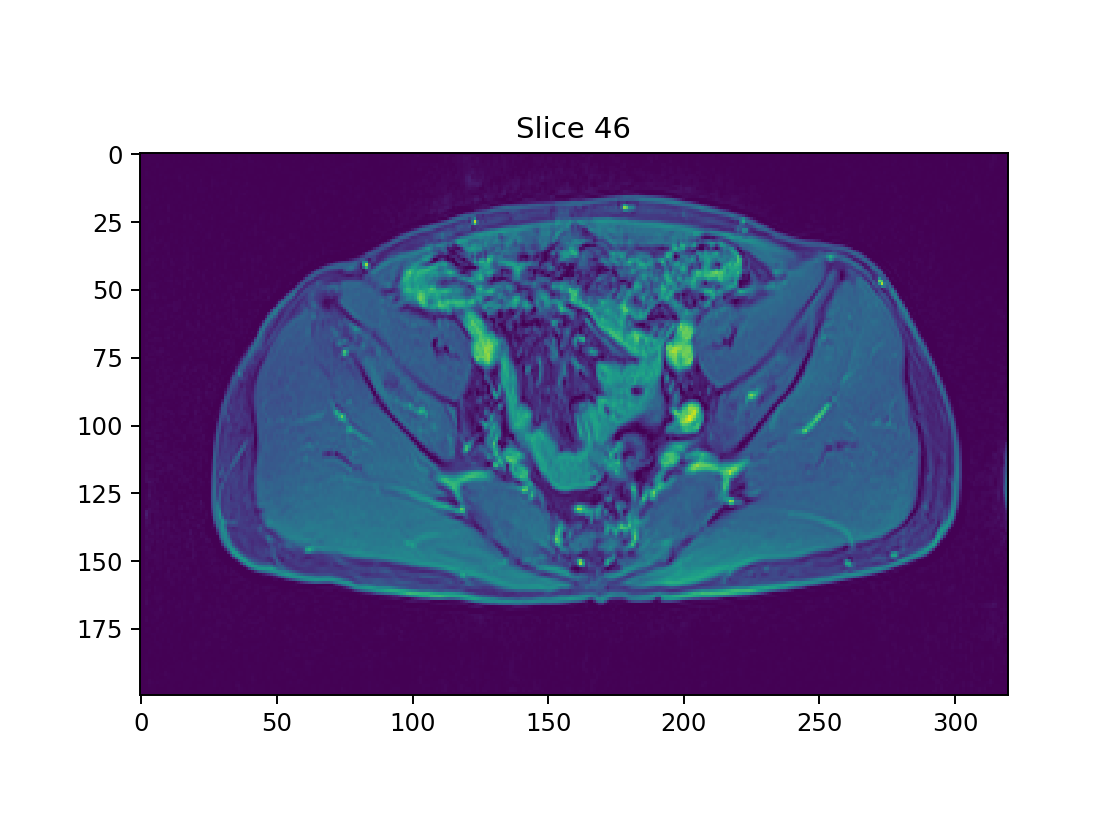

In [10]:
multi_viewer_presskey(img_arr)

In [8]:
def multi_viewer_scroll(volume):
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    ax.set_title('Slice ' + str(ax.index))
    fig.canvas.mpl_connect('scroll_event', scroll_mouse)

    
def scroll_mouse(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.button == 'up':
        previous_slice(ax)
    elif event.button == 'down':
        next_slice(ax)
    fig.canvas.draw()

<IPython.core.display.Javascript object>


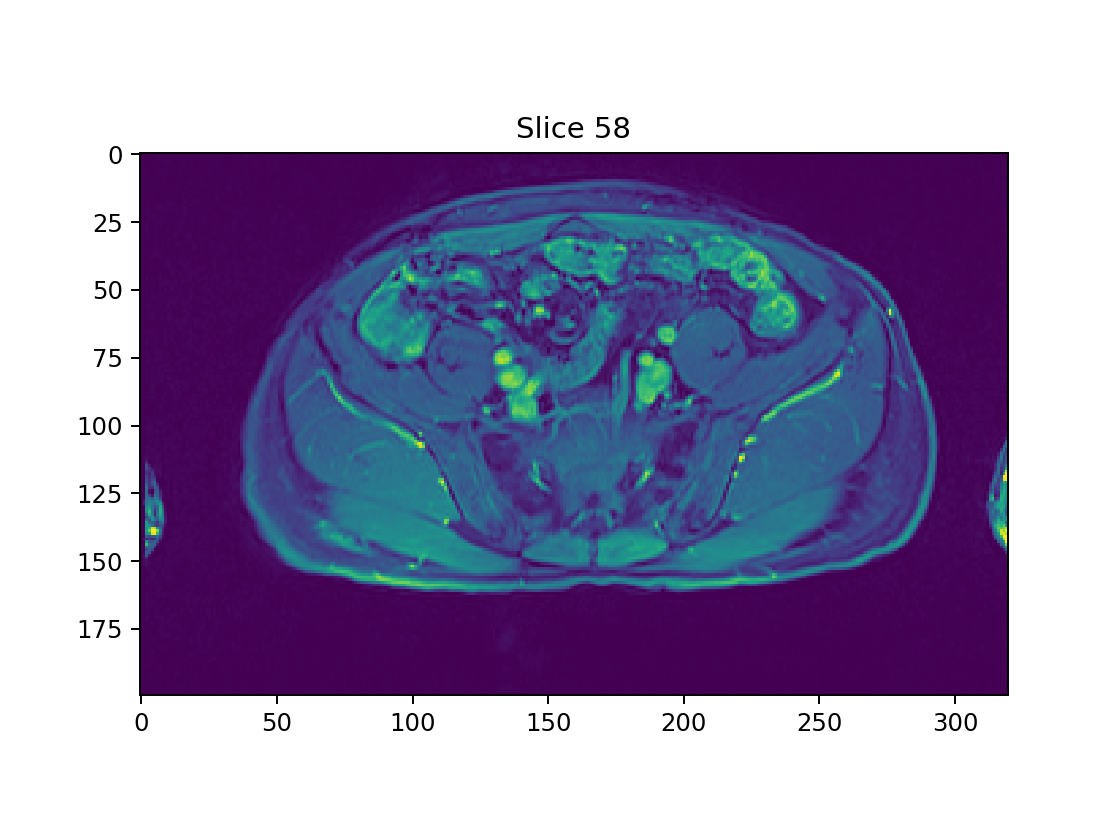

In [9]:
multi_viewer_scroll(img_arr)

In [11]:
def animation_viewer(volume,interval=100):

    def updatefig(*args):
        volume = ax.volume
        ax.index = (ax.index + 1) % volume.shape[0]
        ax.images[0].set_array(volume[ax.index])
        ax.set_title('Slice ' + str(ax.index))
        return ax.images[0],

    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    ani = animation.FuncAnimation(fig, updatefig, interval=interval, blit=False)
    plt.show()
    return ani

<IPython.core.display.Javascript object>


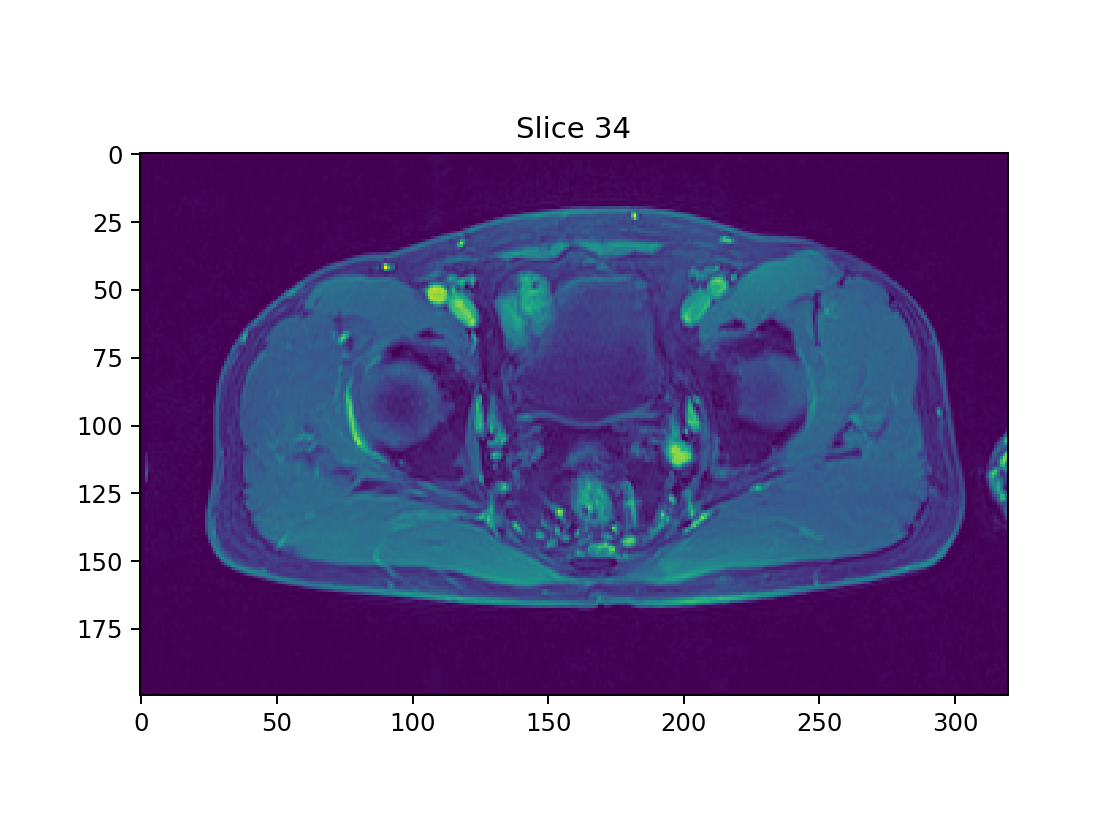

In [17]:
ani = animation_viewer(img_arr,interval=300)